<a href="https://colab.research.google.com/github/utharaprince/nlp/blob/main/NLPproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install emoji

In [ ]:
pip install regex

In [ ]:
pip install googletrans

In [ ]:
pip install git+https://github.com/BoseCorp/py-googletrans.git --upgrade

  Cloning https://github.com/BoseCorp/py-googletrans.git to /tmp/pip-req-build-aes757z4
  Running command git clone -q https://github.com/BoseCorp/py-googletrans.git /tmp/pip-req-build-aes757z4
  Created wheel for googletrans: filename=googletrans-2.3.0-cp37-none-any.whl size=16461 sha256=c7ba308ef12b1db1686efc720c63a465fe52f77243e203913dc703361f52e8b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-e_d45kh_/wheels/6a/fc/9e/2d31d95d9e97da5166afd8225a6f3b6850dc2c6e84accefbfc
Successfully built googletrans
  Found existing installation: googletrans 2.3.0
    Uninstalling googletrans-2.3.0:
      Successfully uninstalled googletrans-2.3.0


In [ ]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import regex 
import re
import emoji
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
wordnet_lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from googletrans import Translator
translator = Translator()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


All Functions

In [ ]:
# Function to detect the date at the start of the line to make each row unique.
def DateTime(s):
    regex_format = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(regex_format, s)
    if result:
        return True
    return False

# Function to extract the group chat participant names
def Participants(a):
  a=a.split(":")
  if len(a)==2:
    return True
  else:
    return False

# Function to organize the data properly to be represented as a pandas dataframe
def GetDataPoints(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if Participants(message): 
        splitMessage = message.split(': ') 
        participants = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        participants = None
    return date, time, participants, message

 # Function to extract the emojis and add them to a new column
def extract_emojis(text):
    return re.findall(emoji.get_emoji_regexp(), text)
print("continue")

continue


Main Starts here

In [ ]:
parsedData=[]
data = []
text_data = '/content/WhatsApp Chat with IEEE SB TKMCE 2021.txt' # replace with the file name of your text data
with open(text_data, encoding="utf-8") as fp: #fp stands for file pointer and helps in reading in the data
    fp.readline()
    messageBuffer = [] 
    date, time, participants = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if DateTime(line):
            if len(messageBuffer)> 0: 
                parsedData.append([date, time, participants, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, participants, message = GetDataPoints(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
    if len(messageBuffer)> 0: 
                parsedData.append([date, time, participants, ' '.join(messageBuffer)])

In [ ]:
clean_data = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Participants', 'Message']) # Reading in the data in a dataframe form
clean_data["Date"] = pd.to_datetime(clean_data["Date"])# making sure the date column is in a datetime format.  
clean_data["emoji"] = clean_data["Message"].apply(extract_emojis) # Applying the emoji function to extract the emojis from the messages.

clean_data

,Date,Time,Participants,Message,emoji
0,2021-11-02,1:00 pm,None,You were added,[]
1,2021-05-15,8:39 pm,+91 80863 36913,<Media omitted>,[]
2,2021-05-15,8:39 pm,+91 80863 36913,_Do you want to know something interesting abo...,[👇🏻]
3,2021-05-15,9:37 pm,Hida,<Media omitted>,[]
4,2021-05-15,9:37 pm,Hida,<Media omitted>,[]
...,...,...,...,...,...
847,2021-07-14,8:43 pm,+91 95447 17747,<Media omitted>,[]
848,2021-07-15,2:09 am,Dilber,<Media omitted>,[]
849,2021-07-15,3:29 am,None,Your security code with Krishna Das changed. T...,[]
850,2021-07-17,7:19 pm,+91 90373 64538,*IEEE Society Membership Promotional codes 202...,"[📌, ✅, 📌, ✅, ✅, ✅, 📌, 📌, ✅, 📌, ✅, 📌, ✅, ✅, 📌, ..."


In [ ]:
clean_data = clean_data[clean_data.Message != '<Media omitted>']
clean_data = clean_data[clean_data.Message != 'This message was deleted']
clean_data = clean_data[clean_data.Message != 'You were added']
clean_data

,Date,Time,Participants,Message,emoji
2,2021-05-15,8:39 pm,+91 80863 36913,_Do you want to know something interesting abo...,[👇🏻]
6,2021-05-16,3:22 pm,+91 80863 36913,“Dont count the days. Make the days count” Dr...,"[🔸, 🔸, 🔸]"
8,2021-05-16,3:23 pm,+91 80863 36913,"_""All knowledge is connected to all other know...","[🗓, 🕘, 💰]"
11,2021-05-16,6:27 pm,Sarath,_“I believe in the unlimited power of women in...,"[📣, 🎓, 👩‍🔧, 👩‍💻, 👱‍♀️, 📧, 🏆, 🥇, 🥈, 🥉, 🗓, ✒]"
12,2021-05-16,6:27 pm,Sarath,Game Dev Diaries is a three phase game develop...,[]
...,...,...,...,...,...
843,2021-07-13,6:53 pm,None,Your security code with Aarathi changed. Tap t...,[]
846,2021-07-14,8:43 pm,+91 95447 17747,_*The only source of knowledge is experience*_...,"[💫, 👇🏻]"
849,2021-07-15,3:29 am,None,Your security code with Krishna Das changed. T...,[]
850,2021-07-17,7:19 pm,+91 90373 64538,*IEEE Society Membership Promotional codes 202...,"[📌, ✅, 📌, ✅, ✅, ✅, 📌, 📌, ✅, 📌, ✅, 📌, ✅, ✅, 📌, ..."


In [ ]:
messages = []
stop_words = set(stopwords.words('english'))

for words in clean_data['Message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words) #making non alpha to space
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] #lemmatizes the words i.e convert similar words to their
    # base form while still considering the context in which the words are used 
    
    messages.append(' '.join(lemmas)) 
print("sample")
print(only_letters)
print(tokens)
print(filtered_result)
print(lemmas)

sample
Your security code with                 changed  Tap to learn more 
['Your', 'security', 'code', 'with', 'changed', 'Tap', 'to', 'learn', 'more']
['security', 'code', 'changed', 'tap', 'learn']
['security', 'code', 'changed', 'tap', 'learn']


In [ ]:
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in messages:
    #word=translator.translate(word).text
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)                

print('Positive :',pos_word_list)        
print('Neutral :',neu_word_list)    
print('Negative :',neg_word_list)

Positive : ['want know something interesting radio communication part telecommunication day ieee comsoc kerala chapter collaboration ieee comsoc sbc ukfcet workshop amateur radio session air live demo amateur radio mr abhijit ar ham operator call sign vu sv session amateur radio station licensing prof shankar j ham operator call sign vu fiy date th may time pm fee detail comsoc member free ieee member r non ieee member r grab shot http comsoc ieeekerala org workshop query contact faresh rahman dayana reji', 'dont count day make day count dreaming get government job engineering know get started jump something especially ieee pie kerala section association ieee young professional kerala section powered ieee region young professional part arise present launchpad b tech student government employee let discover roadmap securing government job making dream come true session ammu sanil educator entri app experienced guiding light student path waiting go grab ticket future http bit ly arise ti

In [ ]:
pos=len(pos_word_list)
neu=len(neu_word_list)
neg=len(neg_word_list)
if(pos>neu and pos>neg):
 {
    print("The chat is positive")
 }

if(neg>pos and neg>neu):
 {
    print("The chat is negative")
 }

if(neu>neg and neu>pos):
 {
    print("The chat is neutral")
 }

The chat is positive


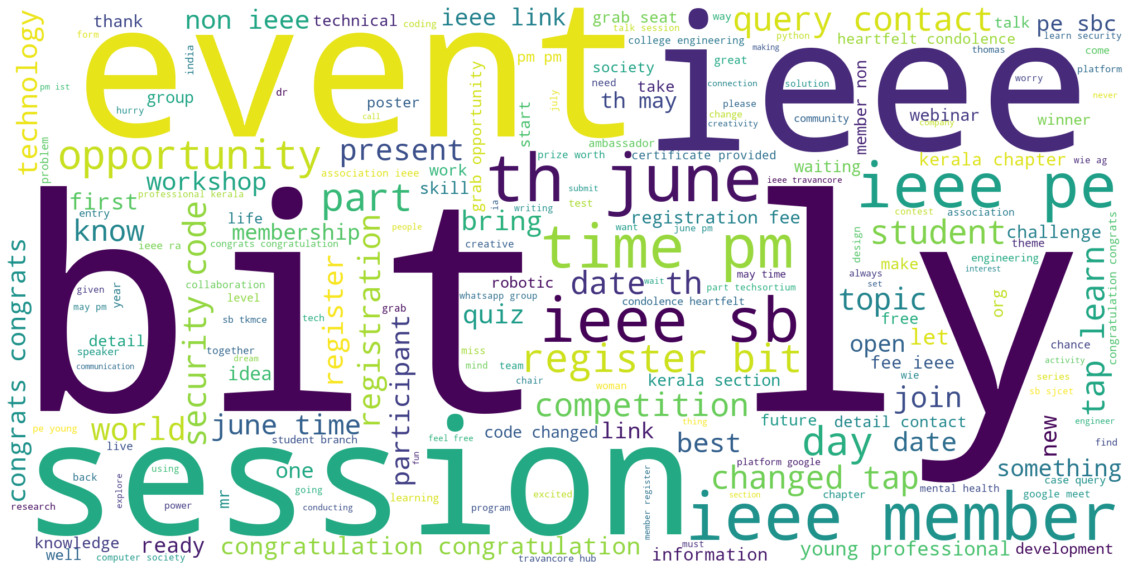

In [ ]:
unique_string=(" ").join(messages)
wordcloud1 = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
co = CountVectorizer(ngram_range=(2,2),stop_words='english')
counts = co.fit_transform(messages)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(200)

,0
bit ly,101
http bit,79
ieee member,65
th june,64
ieee pe,58
...,...
opportunity come,4
connected http,4
session mr,4
date rd,4


In [ ]:
Total_emojis = list([a for b in clean_data.emoji for a in b])
emoji_list = dict(Counter(Total_emojis))
#emoji_list = sorted(emoji_list.items(), key=lambda x: x[1], reverse=True)
for i in emoji_list:
  print(i)


('👏', 175)
('🥳', 96)
('📌', 88)
('✨', 77)
('👏🏻', 74)
('💐', 60)
('🗓', 50)
('💫', 38)
('⚡', 32)
('🔥', 32)
('😔', 26)
('🎉', 26)
('👏🏼', 26)
('🤩', 25)
('🌹', 24)
('🔴', 24)
('👇🏻', 23)
('⭕', 20)
('🏆', 19)
('⏰', 18)
('📞', 18)
('❤', 17)
('🔸', 15)
('❗', 15)
('🔹', 15)
('✅', 15)
('▫', 14)
('📱', 13)
('💥', 12)
('♥', 12)
('💯', 11)
('😍', 10)
('🙏', 9)
('💻', 9)
('‼', 8)
('👇', 8)
('🔗', 8)
('📜', 8)
('🎁', 7)
('💚', 7)
('📍', 7)
('😇', 7)
('☎', 6)
('⬇', 6)
('💡', 6)
('🥰', 6)
('⚠', 5)
('🤔', 5)
('\U0001f7e3', 5)
('⚫', 4)
('📅', 4)
('🎙', 4)
('🧠', 4)
('🙌', 4)
('◼', 4)
('💵', 4)
('⏱', 4)
('🖥', 4)
('🕐', 4)
('💓', 4)
('💰', 3)
('🥇', 3)
('🛑', 3)
('✋', 3)
('🚨', 3)
('📲', 3)
('🧩', 3)
('👉', 3)
('\U0001f90d', 3)
('🔘', 3)
('🏷', 3)
('🕔', 3)
('🕰', 3)
('😃', 3)
('♦', 3)
('▪', 3)
('❣', 3)
('👍', 3)
('📣', 2)
('🥈', 2)
('🥉', 2)
('📎', 2)
('🌟', 2)
('💞', 2)
('💪', 2)
('🎊', 2)
('🕕', 2)
('📢', 2)
('🔑', 2)
('🏁', 2)
('📯', 2)
('🕖', 2)
('⏳', 2)
('💕', 2)
('🎀', 2)
('😉', 2)
('🌍', 2)
('✏', 2)
('🙌🏿', 2)
('📝', 2)
('❕', 2)
('📆', 2)
('🧑\u200d💻', 2)
('👉🏻', 2)
(